<a href="https://colab.research.google.com/github/haradats/pandasNotebook/blob/main/pandasNote04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy import stats

# 乱数の作成と再現性の確認

In [ ]:
stats.uniform.rvs(size=5)

array([0.43732926, 0.04345564, 0.58750006, 0.98169373, 0.71504795])

In [ ]:
stats.uniform.rvs(size=5,random_state=3)

array([0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695])

In [ ]:
stats.uniform.rvs(size=10, random_state=3)

array([0.5507979 , 0.70814782, 0.29090474, 0.51082761, 0.89294695,
       0.89629309, 0.12558531, 0.20724288, 0.0514672 , 0.44080984])

# サンプルデータセットの作成

In [ ]:
df = pd.DataFrame()
df['Uni'] = stats.uniform.rvs(size=10000)   # 一様乱数
df['Norm'] = stats.norm.rvs(loc=0, scale=1, size=10000)   # 正規分布に沿った乱数
df['LogNorm'] = stats.lognorm.rvs(s=1, size=10000)   # 対数正規分布に沿った乱数
df

,Uni,Norm,LogNorm
0,0.785190,0.311850,1.843597
1,0.422684,0.231697,0.828312
2,0.699007,-0.461178,0.634188
3,0.569683,-1.219143,0.218444
4,0.910989,0.089216,1.729380
...,...,...,...
9995,0.674562,-0.257252,0.757310
9996,0.772198,-0.371088,1.149445
9997,0.060222,-0.881276,3.732590
9998,0.648784,-2.026169,0.972248


# 分布を確認

<Axes: >

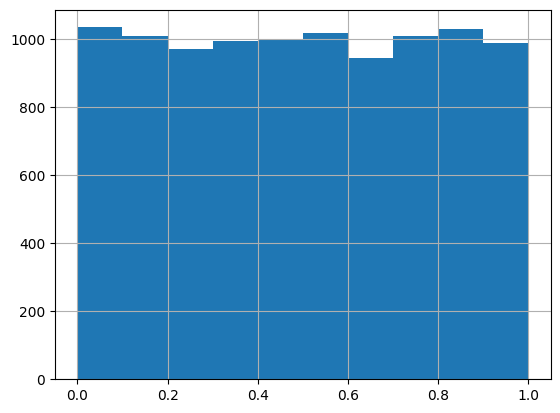

In [ ]:
df['Uni'].hist()

<Axes: >

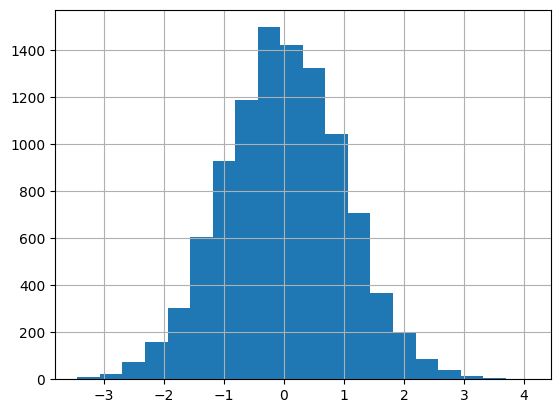

In [ ]:
df['Norm'].hist(bins=20)

<Axes: >

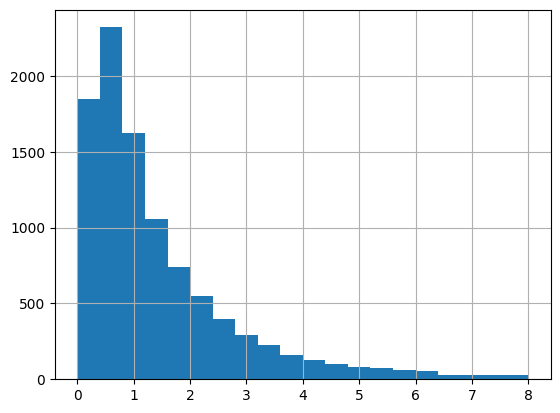

In [ ]:
df['LogNorm'].hist(bins=20, range=(0,8))

# 統計処理のための機能

In [ ]:
df

,Uni,Norm,LogNorm
0,0.785190,0.311850,1.843597
1,0.422684,0.231697,0.828312
2,0.699007,-0.461178,0.634188
3,0.569683,-1.219143,0.218444
4,0.910989,0.089216,1.729380
...,...,...,...
9995,0.674562,-0.257252,0.757310
9996,0.772198,-0.371088,1.149445
9997,0.060222,-0.881276,3.732590
9998,0.648784,-2.026169,0.972248


# 方法その１：describeメソッド

In [ ]:
r = df.describe()
r

,Uni,Norm,LogNorm
count,10000.000000,10000.000000,10000.000000
mean,0.499602,0.004095,1.610703
std,0.289676,0.996450,1.973657
min,0.000028,-3.437490,0.018090
25%,0.248886,-0.673824,0.501913
50%,0.498747,-0.002196,0.984279
75%,0.753091,0.680387,1.943329
max,0.999969,4.069120,23.559631


In [ ]:
r.loc['mean','Norm']   # 指定したカラムの平均値

0.004095431590620569

In [ ]:
r.loc['mean']   # カラム毎の平均値

,mean
Uni,0.499602
Norm,0.004095
LogNorm,1.610703


## 方法その２：個別のメソッド

In [ ]:
df['Norm'].mean()   # 指定したカラムの平均値

0.004095431590620569

In [ ]:
df.mean()   # カラム毎の平均値

,0
Uni,0.499602
Norm,0.004095
LogNorm,1.610703


### 分散、標準偏差

In [ ]:
df['Norm'].var()   # 不偏分散

0.9929123635603136

In [ ]:
df['Norm'].var(ddof=0)   # 標本分散

0.9928130723239575

In [ ]:
df['Norm'].std()   # 不偏標準偏差

0.9964498801045207

In [ ]:
df['Norm'].std(ddof=0)   # 標本標準偏差

0.9964000563648908

### データの個数、最小値、最大値

In [ ]:
df['Norm'].count()   # データの個数

10000

In [ ]:
df['Norm'].min()   # 最小値

-3.4374904783431894

In [ ]:
df['Norm'].max()   # 最大値

4.0691195816360315

## 分位数の求め方

In [ ]:
df['Norm'].quantile(0.25)   # 第一四分位数

-0.6738239440606382

In [ ]:
df['Norm'].quantile(0.3)

-0.5120872377533517

# 質的データ（カテゴリデータ）の扱い

In [ ]:
sr = pd.Series(['a','b','b','c','c','c'])
sr

,0
0,a
1,b
2,b
3,c
4,c
5,c


## 要素の集計

In [ ]:
sr.value_counts()   # 要素毎の個数

,count
c,3
b,2
a,1


In [ ]:
sr.mode()   # 最頻値（最多の要素）を調べる

,0
0,c


### DataFrameの扱い

In [ ]:
df = pd.DataFrame()
df

""


In [ ]:
df['col'] = sr
df['col2'] = ['a','b','b','b','c','c']
df['col3'] = ['b','b','b','c','c','c']
df

,col,col2,col3
0,a,a,b
1,b,b,b
2,b,b,b
3,c,b,c
4,c,c,c
5,c,c,c


In [ ]:
df['col3'].value_counts()

,count
col3,
b,3
c,3


In [ ]:
df.mode()

,col,col2,col3
0,c,b,b
1,NaN,NaN,c
